In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
%matplotlib inline
from sklearn import tree

In [2]:
import ReadingFile
import PreprocessData

X, y = ReadingFile.read_csv('TRAIN_CORPUS.csv')
X

array([[   1.,    0.,    0., ...,    3.,    3.,    3.],
       [   1.,    0.,    1., ...,   59.,   59.,   70.],
       [   1.,    0.,    0., ...,   51.,   51.,   69.],
       ..., 
       [   1.,    0.,    0., ...,    2.,    2.,    2.],
       [   0.,    0.,    1., ...,   75.,   75.,  113.],
       [   0.,    0.,    0., ...,   95.,   95.,  110.]])

In [3]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

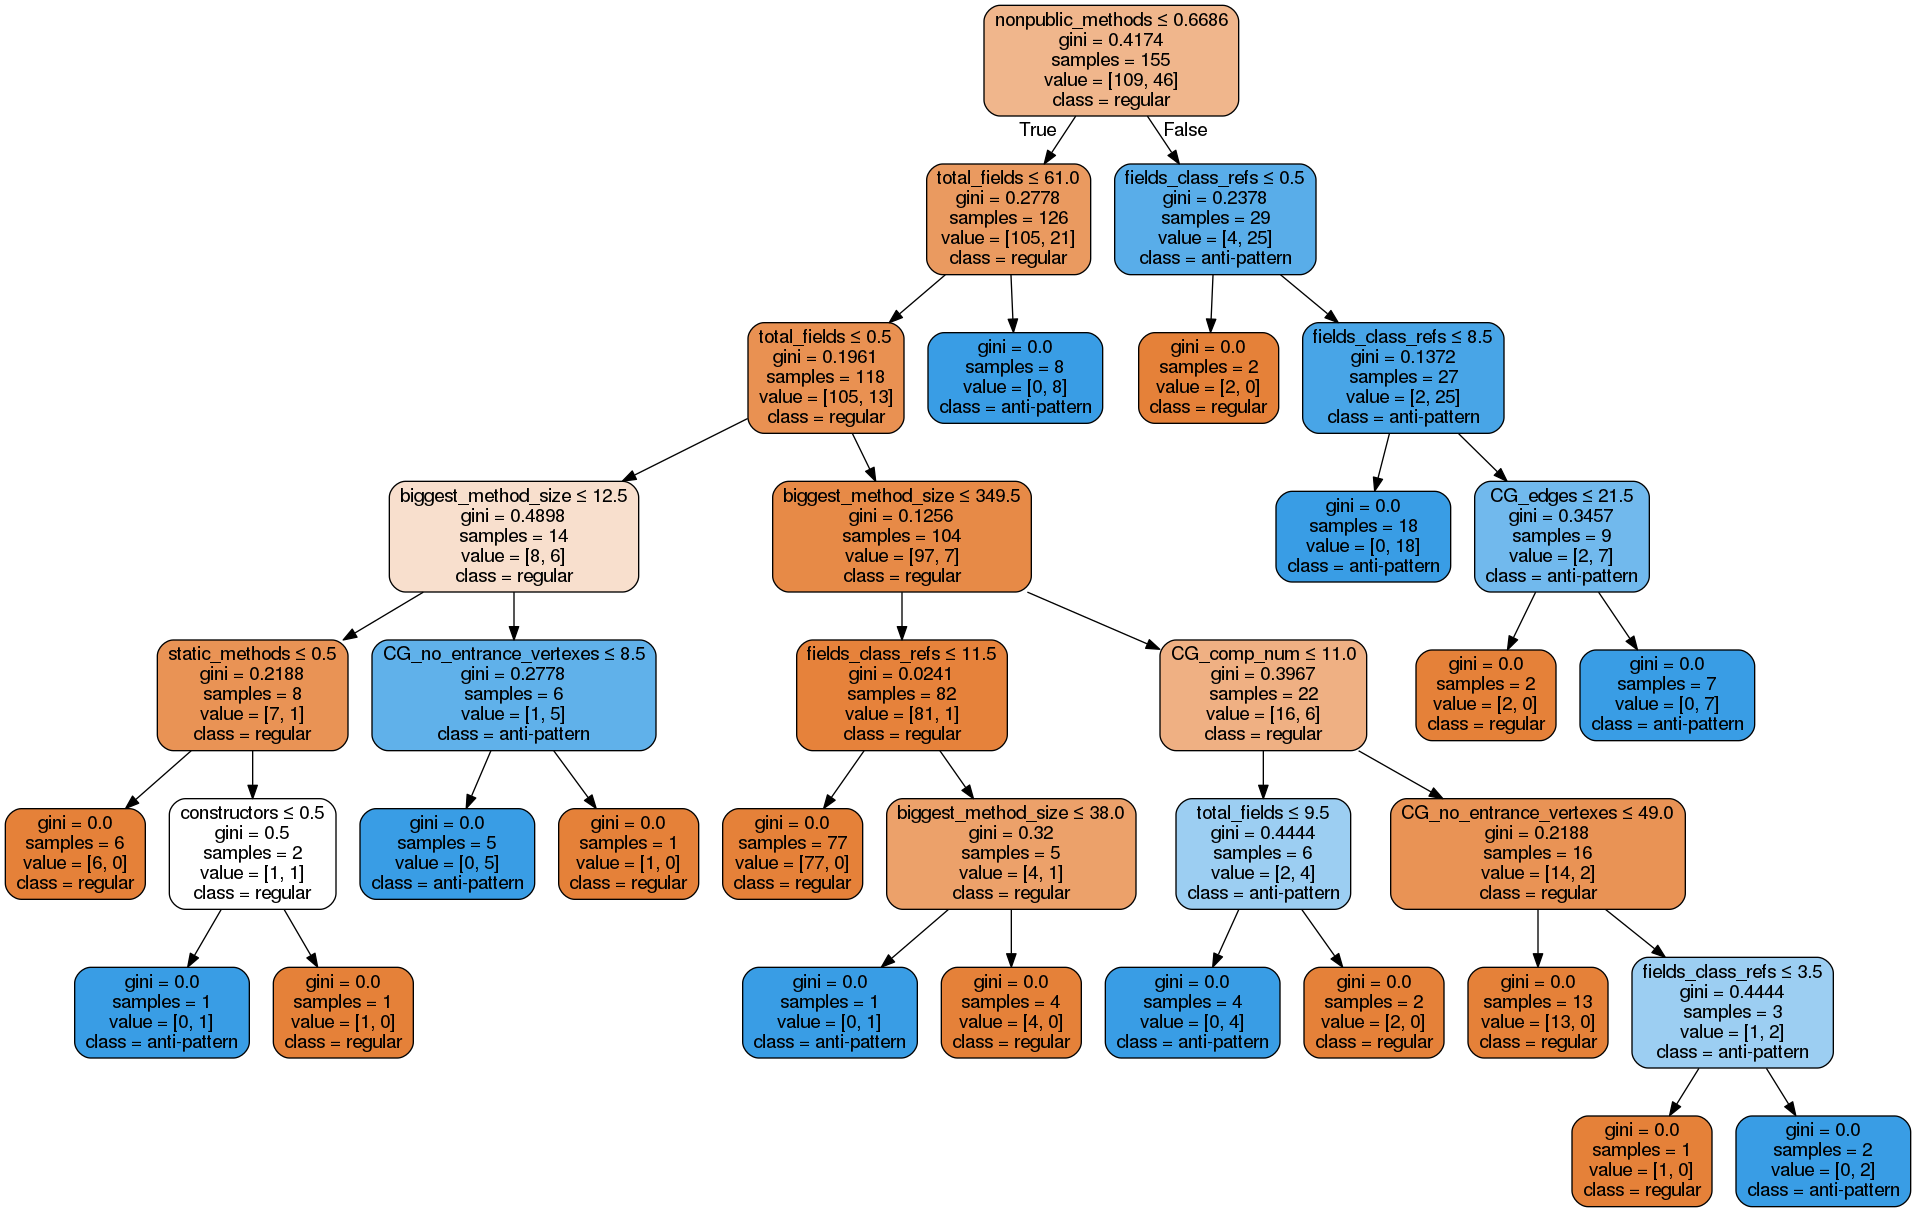

In [4]:
import pydotplus
from IPython.display import Image
from matplotlib.pyplot import savefig

feature_names = [ 'verb_in_name', 'template', 'is_inherited',
                  'constructors', 'total_methods', 'nonpublic_methods', 'static_methods', 'biggest_method_size',
                  'total_fields', 'nonpublic_fields', 'fields_class_refs', 'getters', 'setters',
                  'CG_edges', 'CG_no_entrance_vertexes', 'CG_no_out_vertexes',
                  'CG_comp_num', 'CG_strong_comp_num']
target_names = np.array(['regular', 'anti-pattern'])
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=feature_names, 
                                class_names=target_names, 
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
pct = Image(graph.create_png())
pct

In [9]:
from sklearn import metrics

# make predictions
expected = y
predicted = decision_tree.predict(X)
# summarize the fit of the model
print 'CLASSIFICATION REPORT:'
print(metrics.classification_report(expected, predicted))
print 'CONFUSION MATRIX:'
print(metrics.confusion_matrix(expected, predicted))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       109
        1.0       1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00       155

CONFUSION MATRIX:
[[109   0]
 [  0  46]]
